# VGGNet

In [101]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16,decode_predictions

vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [111]:
import numpy as np
from PIL import Image
import cv2

img = np.array(Image.open('images/elephant.jpg').resize((224,224)))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
yhat = vgg.predict(img.reshape(-1,224,224,3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]


In [112]:
# import numpy as np
# import cv2
# import time 

# img = cv2.imread('images/dear.jpg', -1)
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img, (224, 224))

# start = time.time() 
# yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
# time = time.time() - start
# # label_key = np.argmax(yhat)
# label = decode_predictions(yhat)
# label = label[0][0]

African_elephant (55.56%)


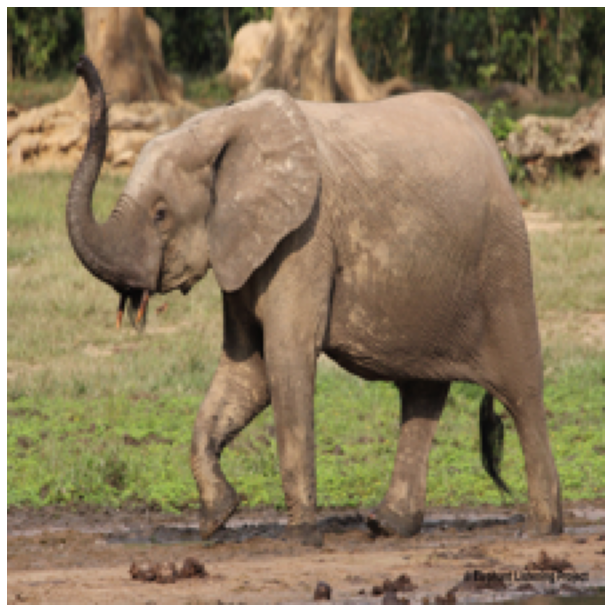

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
print('%s (%.2f%%)' % (label[1], label[2]*100))
plt.figure(figsize=(11,11))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()